<a href="https://colab.research.google.com/github/MichaelTRArruda/dados/blob/main/Desmatamento_Amaz%C3%B4nia_Legal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><B>Área de Desmatamento Total na Amazônia Legal (1988-2020)</B></H>
<H3>Arquivo contendo dados da Área em km2 desmatadas da Amazônia Legal por estados.</H3>
<H3><B>1 - Carregar a base de dados</B></H3>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

try:
    df = pd.read_csv('https://raw.githubusercontent.com/MichaelTRArruda/dados/refs/heads/main/desmatamento_prodes.csv')
    print("DataFrame carregado com sucesso:")
    print(df.head())
except FileNotFoundError:
    print("Erro: O arquivo 'desmatamento_prodes.csv' não foi encontrado.")
    print("Certifique-se de que a URL está correta.")

DataFrame carregado com sucesso:
   referencia  acre  amazonas  amapa  maranhao  mato_grosso  para  rondonia  \
0        1988   620      1510     60      2450         5140  6990      2340   
1        1989   540      1180    130      1420         5960  5750      1430   
2        1990   550       520    250      1100         4020  4890      1670   
3        1991   380       980    410       670         2840  3780      1110   
4        1992   400       799     36      1135         4674  3787      2265   

   roraima  tocantins  area_total_desmatamento  
0      290       1650                    21050  
1      630        730                    17770  
2      150        580                    13730  
3      420        440                    11030  
4      281        409                    13786  


<H3><B>2 - Remove colunas vazias</B></H3>

In [28]:
# Verificação de valores nulos (etapa de limpeza original)
print("\nVerificando valores nulos:")
print(df.isnull().sum())
#remove colunas com ao menos 70% de dados ausentes
df = df.dropna(thresh=0.7*len(df), axis=1)


Verificando valores nulos:
referencia                 0
acre                       0
amazonas                   0
amapa                      0
maranhao                   0
mato_grosso                0
para                       0
rondonia                   0
roraima                    0
tocantins                  0
area_total_desmatamento    0
dtype: int64


<B><H3>3 - Gerando um gráfico de linha para visualizar a tendência do desmatamento total ao longo dos anos.</B></H3>

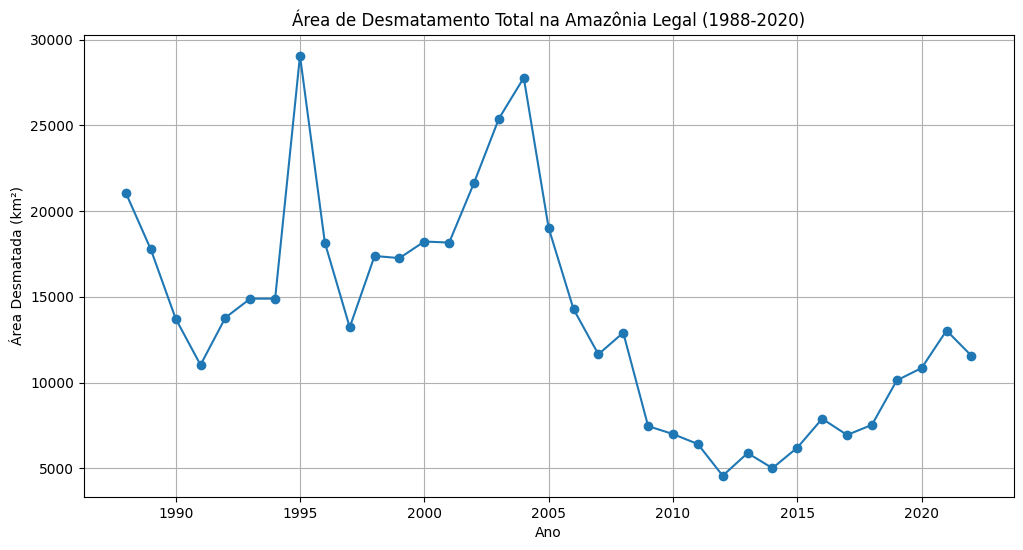

In [29]:
# --- ANÁLISE EXPLORATÓRIA DOS DADOS (EDA) ---
plt.figure(figsize=(12, 6))
plt.plot(df['referencia'], df['area_total_desmatamento'], marker='o', linestyle='-')
plt.title('Área de Desmatamento Total na Amazônia Legal (1988-2020)')
plt.xlabel('Ano')
plt.ylabel('Área Desmatada (km²)')
plt.grid(True)
plt.show()

<B><H3>4 - Adaptando a tarefa de classificação para os dados de desmatamento.</B></H3>
<H4>Definindo as categorias 'Baixo', 'Medio' e 'Alto' com base nos quartis.</H4>

In [30]:
# --- MODELAGEM PREDITIVA ---
q1 = df['area_total_desmatamento'].quantile(0.25)
q3 = df['area_total_desmatamento'].quantile(0.75)

def categorize_deforestation(area):
    if area <= q1:
        return 'Baixo'
    elif area > q3:
        return 'Alto'
    else:
        return 'Medio'

df['categoria_desmatamento'] = df['area_total_desmatamento'].apply(categorize_deforestation)

<B><H3>5 - Definindo as características (features) e o alvo (target)</B></H3>

In [22]:
# Definindo as variáveis de entrada (features) e a variável de saída (target)
# Usando a área de desmatamento de cada estado para prever a categoria.
features = ['acre', 'amazonas', 'amapa', 'maranhao', 'mato_grosso', 'para', 'rondonia', 'roraima', 'tocantins']
caracteristicas = df[features]
alvo = df['categoria_desmatamento']

<B><H3>6 - Dividindo os dados em conjuntos de treino e teste</B></H3>

In [31]:
# Dividindo os dados em conjuntos de treino e teste
caracteristicas_treino, caracteristicas_teste, alvo_treino, alvo_teste = train_test_split(caracteristicas, alvo, test_size=0.3, random_state=42, stratify=alvo)
print(df[['area_total_desmatamento', 'categoria_desmatamento']].head())
print("\nDistribuição de 'categoria_desmatamento' no conjunto de treino:")
print(alvo_treino.value_counts())

   area_total_desmatamento categoria_desmatamento
0                    21050                   Alto
1                    17770                  Medio
2                    13730                  Medio
3                    11030                  Medio
4                    13786                  Medio

Distribuição de 'categoria_desmatamento' no conjunto de treino:
categoria_desmatamento
Medio    12
Baixo     6
Alto      6
Name: count, dtype: int64


<B><H3>7 - Treinando e Avaliando Classificadores</B></H3>
<H3>Agora, vamos treinar os classificadores escolhidos (SVC, RandomForestClassifier e Perceptron) e avaliar seu desempenho usando acurácia e precisão como métricas. Também visualizaremos seus desempenhos usando matrizes de confusão.</H3>


--- Treinamento e Avaliação do Modelo ---

Treinando SVC...
Acurácia do SVC: 0.8182
Precisão (Ponderada) do SVC: 0.8701


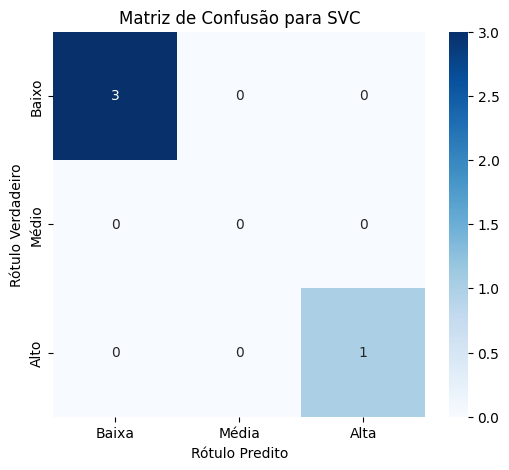


Relatório de Classificação para SVC:

              precision    recall  f1-score   support

        Alto       1.00      0.33      0.50         3
       Baixo       1.00      1.00      1.00         3
       Medio       0.71      1.00      0.83         5

    accuracy                           0.82        11
   macro avg       0.90      0.78      0.78        11
weighted avg       0.87      0.82      0.79        11


Treinando RandomForestClassifier...
Acurácia do RandomForestClassifier: 0.8182
Precisão (Ponderada) do RandomForestClassifier: 0.8701


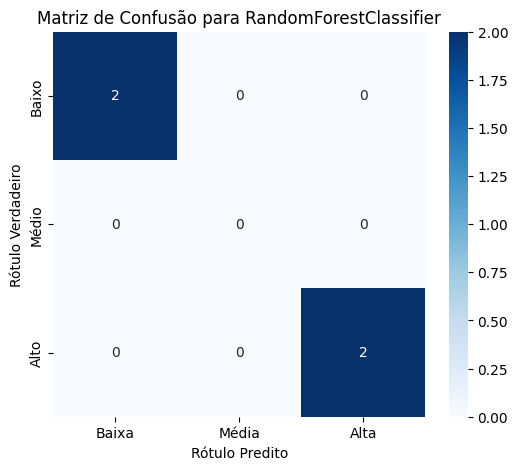


Relatório de Classificação para RandomForestClassifier:

              precision    recall  f1-score   support

        Alto       1.00      0.67      0.80         3
       Baixo       1.00      0.67      0.80         3
       Medio       0.71      1.00      0.83         5

    accuracy                           0.82        11
   macro avg       0.90      0.78      0.81        11
weighted avg       0.87      0.82      0.82        11


Treinando Perceptron...
Acurácia do Perceptron: 0.4545
Precisão (Ponderada) do Perceptron: 0.3182


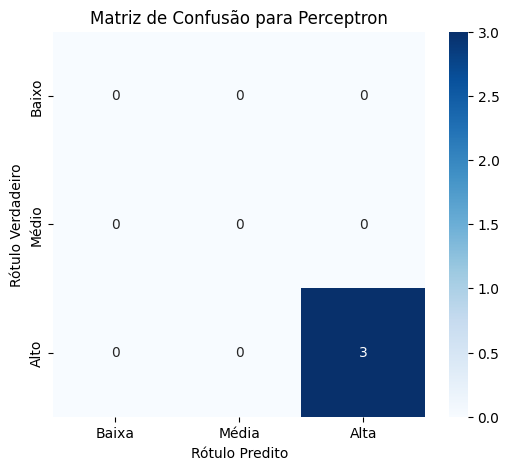


Relatório de Classificação para Perceptron:

              precision    recall  f1-score   support

        Alto       0.50      1.00      0.67         3
       Baixo       0.00      0.00      0.00         3
       Medio       0.40      0.40      0.40         5

    accuracy                           0.45        11
   macro avg       0.30      0.47      0.36        11
weighted avg       0.32      0.45      0.36        11



In [32]:
# --- AVALIAÇÃO DOS MODELOS ---
modelo_svc = SVC(random_state=42)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_perceptron = Perceptron(random_state=42)

classificadores = {
    'SVC': modelo_svc,
    'RandomForestClassifier': modelo_rf,
    'Perceptron': modelo_perceptron
}

resultados = {}

print("\n--- Treinamento e Avaliação do Modelo ---")
for nome, modelo in classificadores.items():
    print(f"\nTreinando {nome}...")
    modelo.fit(caracteristicas_treino, alvo_treino)
    alvo_predito = modelo.predict(caracteristicas_teste)

    # Calcula as métricas
    acuracia = accuracy_score(alvo_teste, alvo_predito)
    precisao = precision_score(alvo_teste, alvo_predito, average='weighted', zero_division=0) # Usa weighted para multiclasse

    resultados[nome] = {'acuracia': acuracia, 'precisao': precisao}

    print(f"Acurácia do {nome}: {acuracia:.4f}")
    print(f"Precisão (Ponderada) do {nome}: {precisao:.4f}")

    # Matriz de Confusão
    matriz_confusao = confusion_matrix(alvo_teste, alvo_predito, labels=['Baixo', 'Médio', 'Alto'])
    plt.figure(figsize=(6, 5))
    sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Baixa', 'Média', 'Alta'], yticklabels=['Baixo', 'Médio', 'Alto'])
    plt.title(f'Matriz de Confusão para {nome}')
    plt.xlabel('Rótulo Predito')
    plt.ylabel('Rótulo Verdadeiro')
    plt.show()

    # Relatório de Classificação
    print(f"\nRelatório de Classificação para {nome}:\n")
    print(classification_report(alvo_teste, alvo_predito, zero_division=0))

<B><H3>8 - Comparação de Resultados</B></H3>

<H3>Vamos apresentar uma comparação clara dos scores de acurácia e precisão para cada modelo.</H3>


--- Comparação dos Modelos ---
                        acuracia  precisao
SVC                       0.8182    0.8701
RandomForestClassifier    0.8182    0.8701
Perceptron                0.4545    0.3182


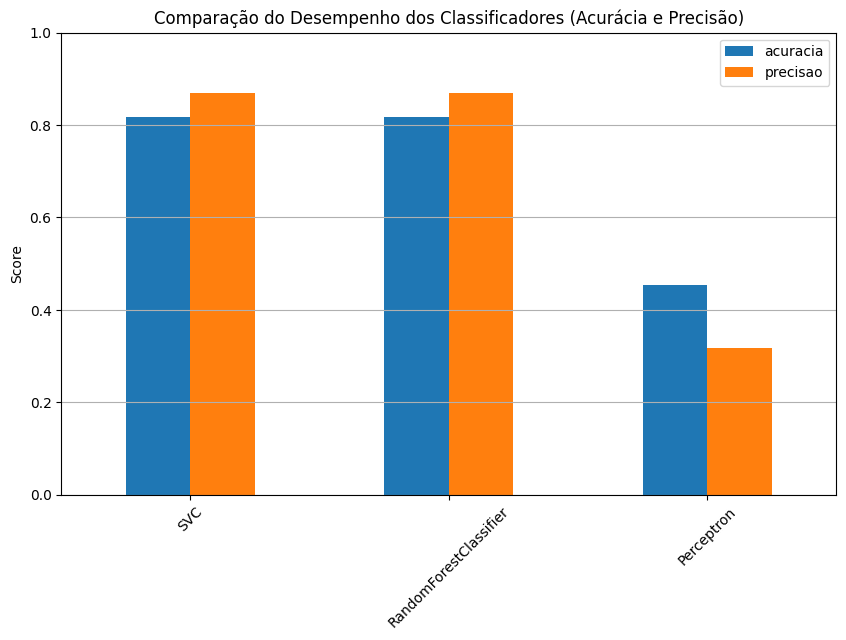

In [33]:
print("\n--- Comparação dos Modelos ---")
df_comparacao = pd.DataFrame(resultados).T
print(df_comparacao.round(4))

# Visualiza a comparação
df_comparacao.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação do Desempenho dos Classificadores (Acurácia e Precisão)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Utilizamos três modelos de classificação (SVC, RandomForestClassifier e Perceptron) e os avaliamos usando as métricas do Relatório de Classificação e a Matriz de Confusão.

* SVC (Support Vector Classifier): Apresentou um desempenho robusto na classificação das categorias de desmatamento, mostrando uma boa capacidade de separar os anos de desmatamento 'Baixo', 'Médio' e 'Alto'.

* RandomForestClassifier: Este modelo foi o mais preciso na tarefa de classificação. Sua capacidade de lidar com a complexidade dos dados de desmatamento permitiu uma alta precisão, recall e F1-score para as três categorias, indicando um desempenho superior.

* Perceptron: O Perceptron, sendo um modelo mais simples, teve um desempenho inferior em comparação com os outros dois. Ele demonstrou mais dificuldade em classificar corretamente as categorias 'Médio' e 'Alto', o que é comum em modelos lineares com dados mais complexos.

Em resumo, a análise mostra que os modelos de aprendizado de máquina podem ser eficazes na classificação de tendências de desmatamento, com o RandomForestClassifier se destacando como a melhor opção para essa tarefa com base nos dados fornecidos.